In [13]:
%config IPCompleter.greedy=True

In [2]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#df = pd.read_csv('UCI-Congress.csv')
#type(df)
#print(df)

digits = datasets.load_digits()

print(digits.keys())
print(digits.DESCR)

dict_keys(['target', 'images', 'data', 'DESCR', 'target_names'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


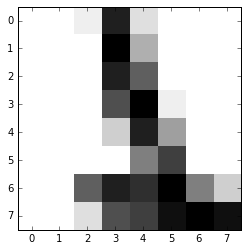

In [5]:
# Display digit 1000th
plt.imshow(digits.images[1000], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [7]:
X = digits.data
y = digits.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [9]:
knn = KNeighborsClassifier(n_neighbors=7)

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [11]:
print(knn.score(X_test, y_test))

0.983333333333


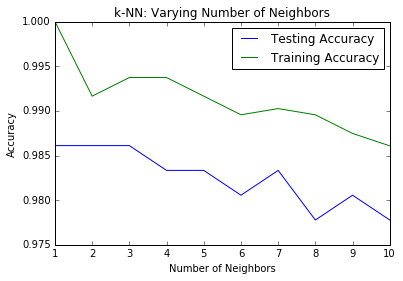

In [12]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 11)
train_accu = np.empty(len(neighbors))
test_accu = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accu[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accu[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accu, label = 'Testing Accuracy')
plt.plot(neighbors, train_accu, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [15]:
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[67  0  0  0  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0  0  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 70  0  0  0  0  1  0]
 [ 0  0  0  0 78  0  0  0  0  0]
 [ 0  0  0  0  0 82  1  0  0  0]
 [ 0  0  0  0  0  0 69  0  0  0]
 [ 0  0  0  0  0  0  0 71  0  0]
 [ 0  2  0  0  0  0  0  0 63  0]
 [ 0  0  0  1  1  1  0  0  0 74]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        67
          1       0.97      1.00      0.99        72
          2       1.00      1.00      1.00        66
          3       0.99      0.99      0.99        71
          4       0.99      1.00      0.99        78
          5       0.99      0.99      0.99        83
          6       0.99      1.00      0.99        69
          7       1.00      1.00      1.00        71
          8       0.98      0.97      0.98        65
          9       1.00      0.96      0.98        77

avg / total       0.99      0.99      0.99       719

